In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import seaborn as sns

## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+MIPS_xFLS_cat.fits')

In [3]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J172157.292+582747.401,260.48871547709,58.4631669127439,36.047565,50.33046,22.906105,-0.006020973,4.9903842e-06,1.000451,2000.0,1.0
HELP_J172149.959+582648.312,260.45816376109,58.4467533677439,9.310755,18.464592,2.7519283,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172156.521+582733.179,260.48550221309,58.4592162607439,83.74838,96.388016,70.7704,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172150.002+582652.059,260.45834254009,58.4477941787439,3.4517977,8.208153,0.8952491,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172158.112+582657.669,260.49213396009,58.4493524757439,41.592514,55.158154,28.037321,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172154.937+582622.555,260.47890287109,58.4395985157439,236.1334,250.01031,221.65387,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172152.074+582702.845,260.46697353308997,58.4507903867439,3.3220572,8.644255,0.922599,-0.006020973,4.9903842e-06,nan,2000.0,1.0
HELP_J172153.735+582618.703,260.47389745309,58.4385287057439,70.92072,85.27206,56.804512,-0.006020973,4.9903842e-06,1.0009941,2000.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

4.997848


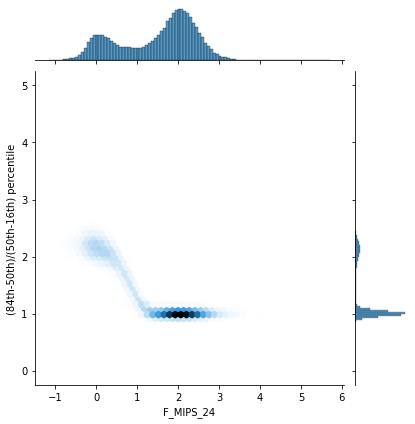

In [4]:
import seaborn as sns
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))

g.savefig('../../data/figs/sk_MIPS_xFLS.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_xFLS.png', bbox='tight')

Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [9]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [10]:
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [11]:
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [12]:
SWIRE_cat.write('./data/dmu26_XID+MIPS_xFLS_cat_20190122.fits', format='fits',overwrite=True)